In [2]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("vehicle.csv")
df.sample(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
349,89,40.0,69.0,147.0,58.0,6,132.0,50.0,18.0,137,155.0,260.0,151.0,61.0,16.0,6.0,203.0,209,car
298,91,40.0,98.0,192.0,64.0,9,177.0,38.0,21.0,135,194.0,465.0,165.0,66.0,9.0,35.0,195.0,205,car
109,99,48.0,79.0,199.0,68.0,6,185.0,35.0,22.0,153,202.0,524.0,171.0,74.0,5.0,8.0,195.0,195,bus
773,87,42.0,70.0,139.0,59.0,7,149.0,45.0,19.0,142,177.0,327.0,156.0,78.0,6.0,9.0,185.0,188,bus
775,97,38.0,75.0,188.0,68.0,6,171.0,37.0,20.0,129,199.0,450.0,137.0,74.0,2.0,6.0,197.0,199,bus
790,85,43.0,66.0,120.0,54.0,5,148.0,46.0,19.0,145,168.0,320.0,174.0,87.0,8.0,2.0,179.0,181,bus
440,101,51.0,98.0,194.0,60.0,10,195.0,34.0,22.0,161,219.0,572.0,219.0,67.0,0.0,10.0,192.0,201,car
749,93,51.0,90.0,209.0,69.0,8,183.0,36.0,22.0,156,211.0,506.0,230.0,70.0,6.0,1.0,189.0,196,car
336,89,44.0,76.0,125.0,54.0,10,156.0,44.0,20.0,151,163.0,352.0,176.0,76.0,12.0,12.0,184.0,193,van
254,93,47.0,85.0,161.0,65.0,12,155.0,43.0,19.0,157,179.0,354.0,178.0,76.0,2.0,9.0,184.0,196,van


In [62]:
df.shape

(846, 19)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

## Finding Misssing Values

In [64]:
print("No. of columns containing null values")
print(len(df.columns[df.isna().any()]))

No. of columns containing null values
14


In [65]:
for col_name in df.columns: 
    print ("column:",col_name,"  Missing:",sum(df[col_name].isnull()))

column: compactness   Missing: 0
column: circularity   Missing: 5
column: distance_circularity   Missing: 4
column: radius_ratio   Missing: 6
column: pr.axis_aspect_ratio   Missing: 2
column: max.length_aspect_ratio   Missing: 0
column: scatter_ratio   Missing: 1
column: elongatedness   Missing: 1
column: pr.axis_rectangularity   Missing: 3
column: max.length_rectangularity   Missing: 0
column: scaled_variance   Missing: 3
column: scaled_variance.1   Missing: 2
column: scaled_radius_of_gyration   Missing: 2
column: scaled_radius_of_gyration.1   Missing: 4
column: skewness_about   Missing: 6
column: skewness_about.1   Missing: 1
column: skewness_about.2   Missing: 1
column: hollows_ratio   Missing: 0
column: class   Missing: 0


## Treating Missing Values

In [0]:
df["circularity"].replace(np.nan, value=df["circularity"].median(), inplace=True)
df["distance_circularity"].replace(np.nan, value=df["distance_circularity"].median(), inplace=True)
df["radius_ratio"].replace(np.nan, value=df["radius_ratio"].median(), inplace=True)
df["pr.axis_aspect_ratio"].replace(np.nan, value=df["pr.axis_aspect_ratio"].median(), inplace=True)
df["scatter_ratio"].replace(np.nan, value=df["scatter_ratio"].median(), inplace=True)
df["elongatedness"].replace(np.nan, value=df["elongatedness"].median(), inplace=True)
df["pr.axis_rectangularity"].replace(np.nan, value=df["pr.axis_rectangularity"].median(), inplace=True)
df["scaled_variance"].replace(np.nan, value=df["scaled_variance"].median(), inplace=True)
df["scaled_variance.1"].replace(np.nan, value=df["scaled_variance.1"].median(), inplace=True)
df["scaled_radius_of_gyration"].replace(np.nan, value=df["scaled_radius_of_gyration"].median(), inplace=True)
df["scaled_radius_of_gyration.1"].replace(np.nan, value=df["scaled_radius_of_gyration.1"].median(), inplace=True)
df["skewness_about"].replace(np.nan, value=df["skewness_about"].median(), inplace=True)
df["skewness_about.1"].replace(np.nan, value=df["skewness_about.1"].median(), inplace=True)
df["skewness_about.2"].replace(np.nan, value=df["skewness_about.2"].median(), inplace=True)

In [67]:
df.isna().any()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
class                          False
dtype: bool

## Handling and removing the Outliers

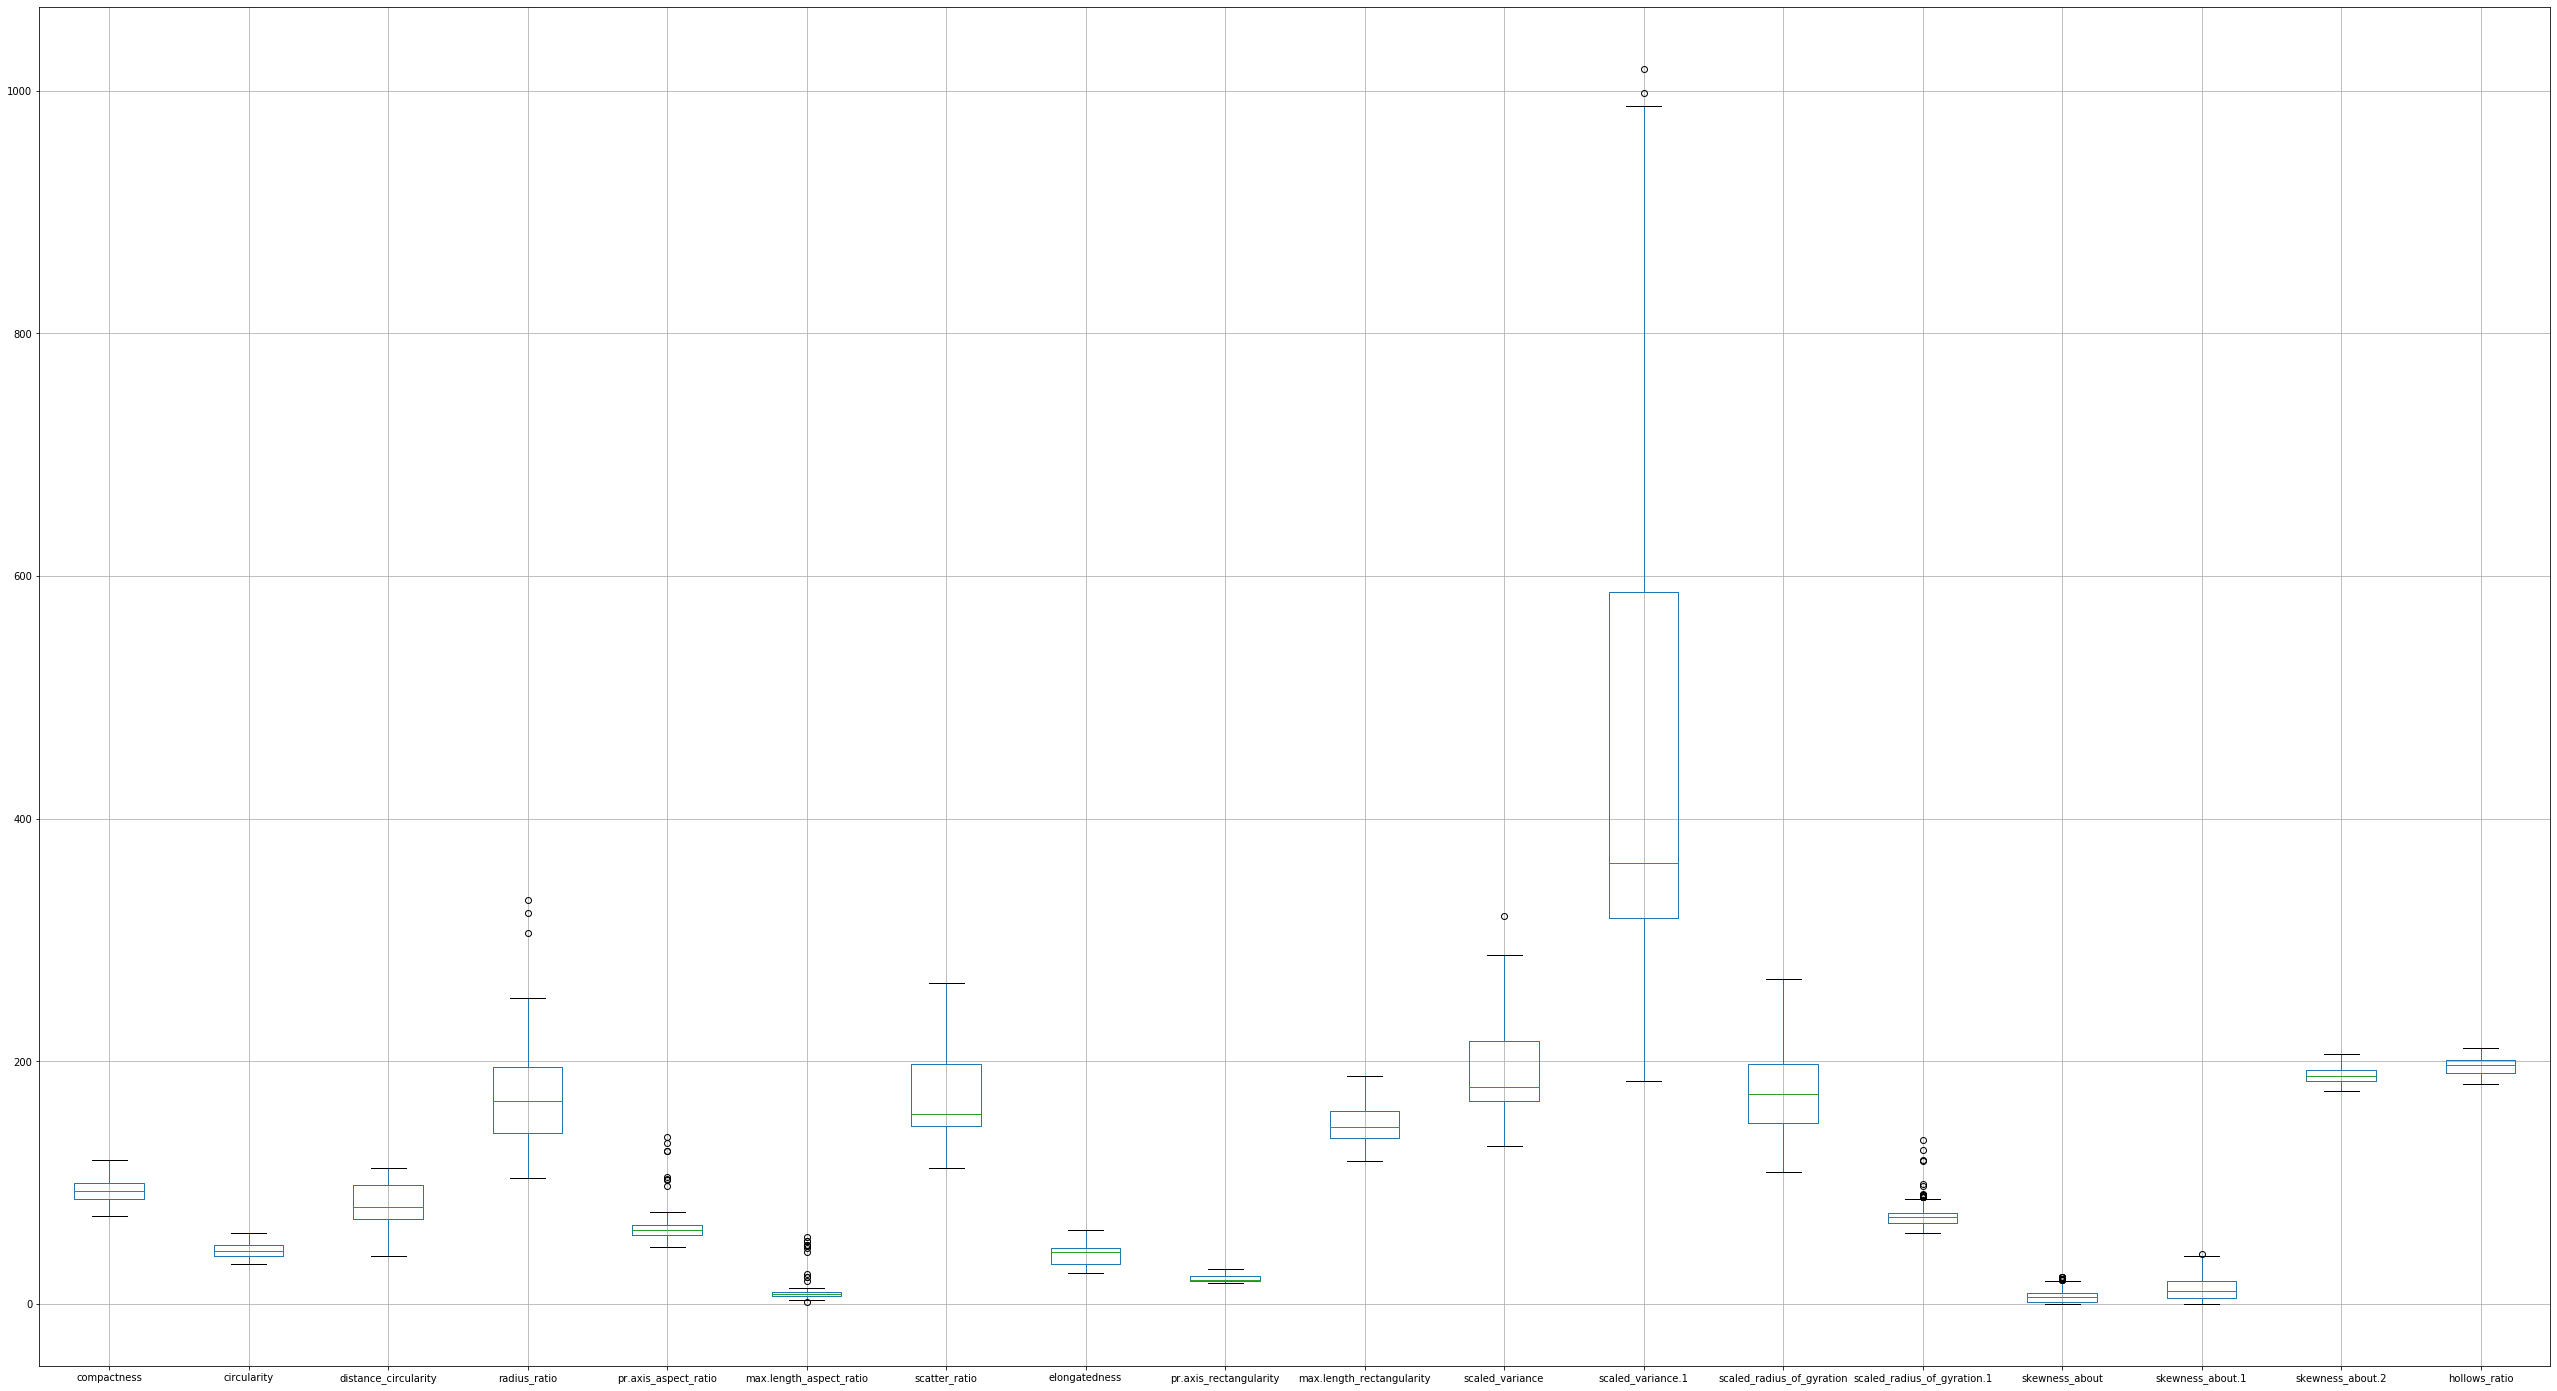

In [68]:
df.boxplot(figsize=(45,25))

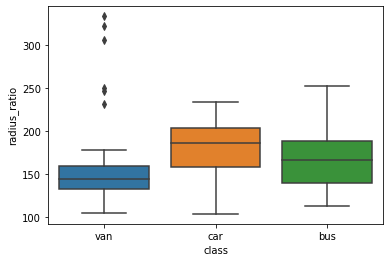

In [69]:
sns.boxplot(x="class", y="radius_ratio", data=df)

In **radius_ratio**, classification values for **van** has outliers. So we only moves the values more than **180** in **van** which as considered as outliers.

In [0]:
df_radius_ratio = pd.crosstab(df['radius_ratio'],df['class'])

In [71]:
df_radius_ratio.head(60)

class,bus,car,van
radius_ratio,,,
104.0,0,1,0
105.0,0,0,1
109.0,0,0,1
110.0,0,1,2
111.0,0,1,3
112.0,0,0,1
113.0,2,0,2
114.0,0,1,3
115.0,0,2,2


In this situation the **139** value as better prediction than other values. So we restrict the outlier to this value.

In [0]:
df['radius_ratio'] = np.where((df['radius_ratio']>180) & (df['class']=="van"),166,df['radius_ratio'])

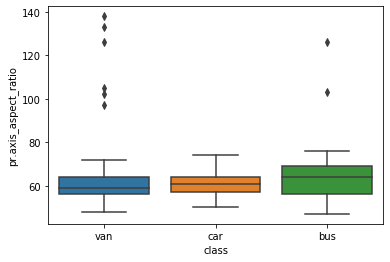

In [73]:
sns.boxplot(x="class", y="pr.axis_aspect_ratio", data=df)

In [0]:
df_pr_axis_aspect_ratio = pd.crosstab(df['pr.axis_aspect_ratio'],df['class'])

In [75]:
df_pr_axis_aspect_ratio.head(60)

class,bus,car,van
pr.axis_aspect_ratio,,,
47.0,2,0,0
48.0,1,0,3
49.0,1,0,2
50.0,3,1,1
51.0,7,1,3
52.0,3,2,9
53.0,8,13,6
54.0,12,16,10
55.0,7,19,11


In [0]:
df['pr.axis_aspect_ratio'] = np.where((df['pr.axis_aspect_ratio']>69) & (df['class']=="van"),64,df['pr.axis_aspect_ratio'])

In [0]:
df['pr.axis_aspect_ratio'] = np.where((df['pr.axis_aspect_ratio']>75) & (df['class']=="bus"),64,df['pr.axis_aspect_ratio'])

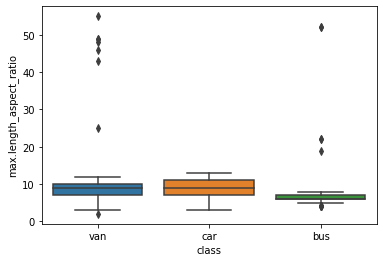

In [78]:
sns.boxplot(x="class", y="max.length_aspect_ratio", data=df)

In [79]:
df_max_length_aspect_ratio = pd.crosstab(df['max.length_aspect_ratio'],df['class'])
df_max_length_aspect_ratio.head(50)

class,bus,car,van
max.length_aspect_ratio,,,
2,0,0,1
3,0,2,2
4,7,9,2
5,26,15,10
6,78,35,19
7,80,62,26
8,22,58,33
9,0,60,34
10,0,80,32


In [0]:
df['max.length_aspect_ratio'] = np.where((df['max.length_aspect_ratio']>8) & (df['class']=="bus"),6,df['max.length_aspect_ratio'])

In [0]:
df['max.length_aspect_ratio'] = np.where((df['max.length_aspect_ratio']<5) & (df['class']=="bus"),6,df['max.length_aspect_ratio'])

In [0]:
df['max.length_aspect_ratio'] = np.where((df['max.length_aspect_ratio']>12) & (df['class']=="van"),8,df['max.length_aspect_ratio'])

In [0]:
df['max.length_aspect_ratio'] = np.where((df['max.length_aspect_ratio']<4) & (df['class']=="van"),8,df['max.length_aspect_ratio'])

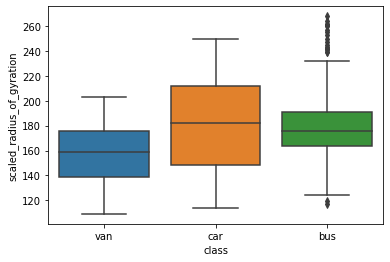

In [84]:
sns.boxplot(x="class", y="scaled_radius_of_gyration", data=df)

In [85]:
df_scaled_radius_of_gyration = pd.crosstab(df['scaled_radius_of_gyration'],df['class'])
df_scaled_radius_of_gyration.tail(50)

class,bus,car,van
scaled_radius_of_gyration,,,
205.0,1,3,0
206.0,2,2,0
207.0,0,2,0
208.0,1,0,0
209.0,2,2,0
210.0,1,5,0
211.0,0,1,0
212.0,0,7,0
213.0,1,6,0


In [0]:
df['scaled_radius_of_gyration'] = np.where((df['scaled_radius_of_gyration']>222) & (df['class']=="bus"),157,df['scaled_radius_of_gyration'])

In [0]:
df['scaled_radius_of_gyration'] = np.where((df['scaled_radius_of_gyration']<117) & (df['class']=="bus"),157,df['scaled_radius_of_gyration'])

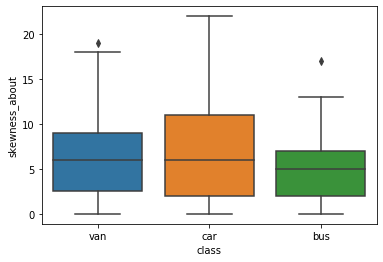

In [88]:
sns.boxplot(x="class", y="skewness_about", data=df)

In [89]:
df_skewness_about = pd.crosstab(df['skewness_about'],df['class'])
df_skewness_about.head(50)

class,bus,car,van
skewness_about,,,
0.0,19,44,14
1.0,22,38,21
2.0,19,29,15
3.0,17,26,13
4.0,28,25,17
5.0,22,35,14
6.0,29,29,13
7.0,18,22,20
8.0,15,19,13


In [0]:
df['skewness_about'] = np.where((df['skewness_about']>17) & (df["class"]=="van"),5,df['skewness_about'])

In [0]:
df['skewness_about'] = np.where((df['skewness_about']>13) & (df["class"]=="bus"),6,df['skewness_about'])

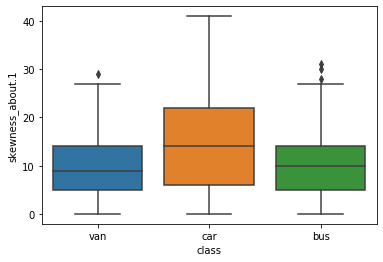

In [92]:
sns.boxplot(x="class", y="skewness_about.1", data=df)

In [93]:
df_skewness_about = pd.crosstab(df['skewness_about.1'],df['class'])
df_skewness_about.head(60)

class,bus,car,van
skewness_about.1,,,
0.0,9,11,10
1.0,15,16,7
2.0,9,19,9
3.0,8,14,10
4.0,13,18,10
5.0,7,20,9
6.0,11,14,12
7.0,12,16,16
8.0,14,8,10


In [0]:
df['skewness_about.1'] = np.where((df['skewness_about.1']>26) & (df["class"]=="bus"),14,df['skewness_about.1'])

In [0]:
df['skewness_about.1'] = np.where((df['skewness_about.1']>27) & (df["class"]=="van"),14,df['skewness_about.1'])

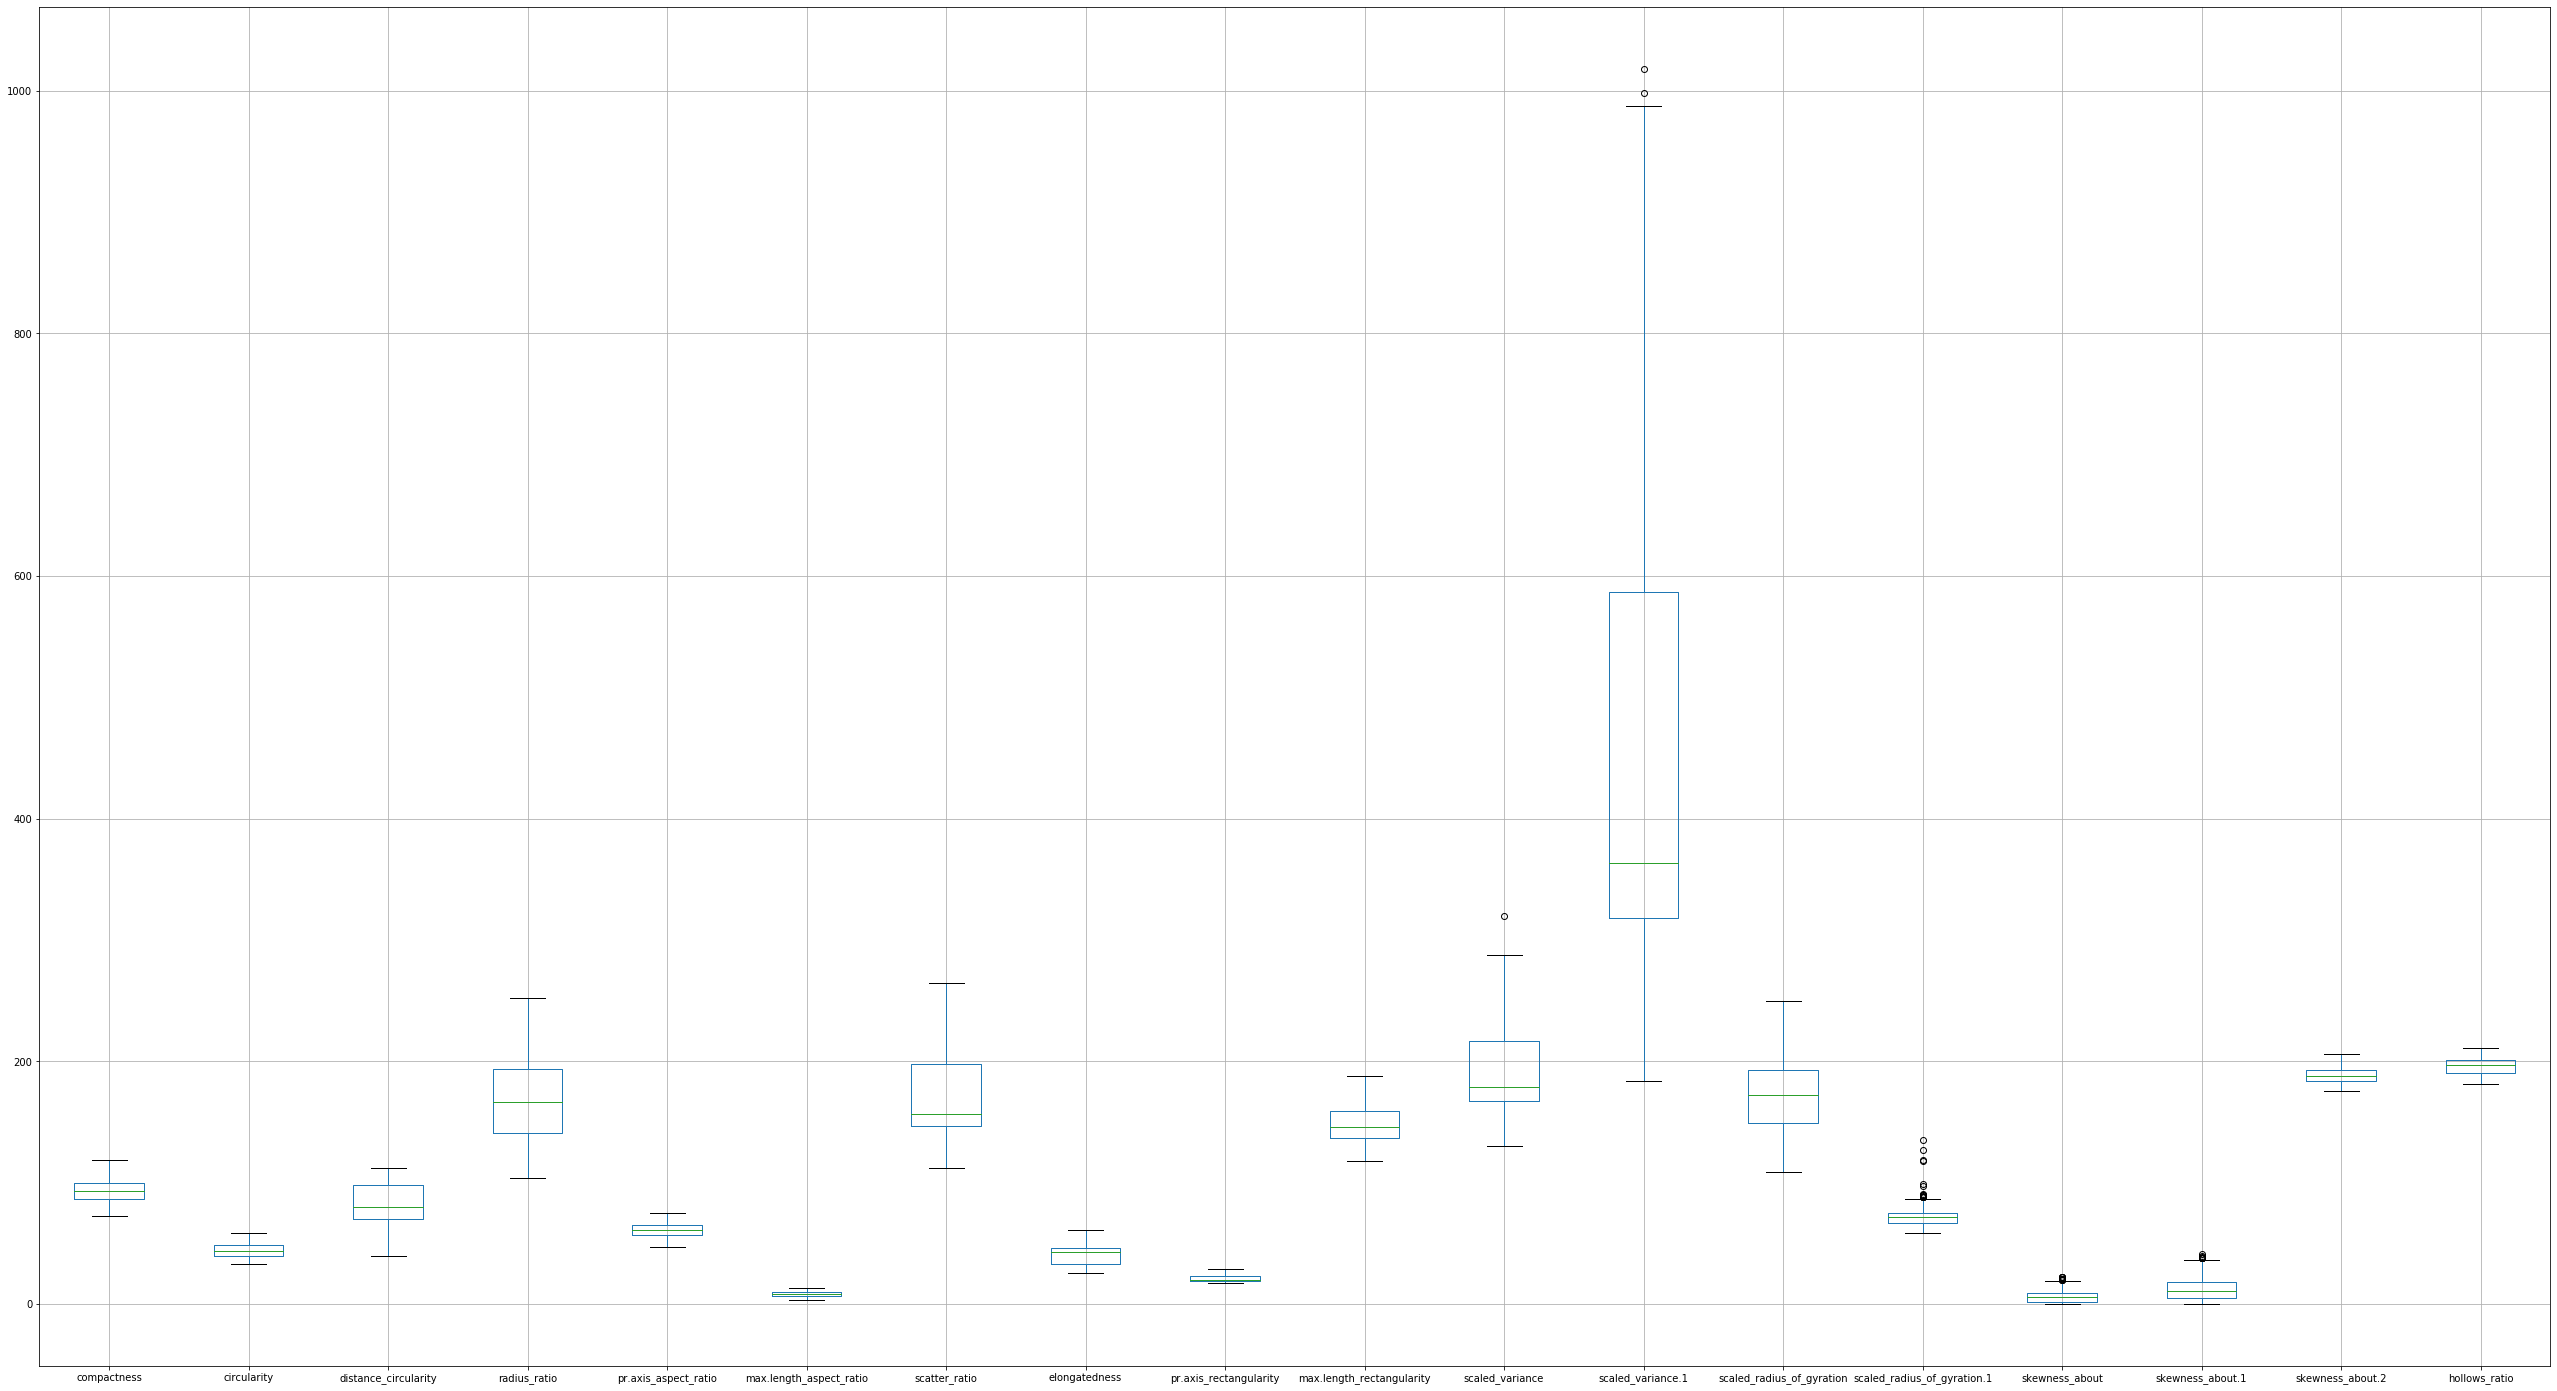

In [96]:
df.boxplot(figsize=(45,25))

## Finding the relationship between different attributes

In [97]:
sns.pairplot(df, hue="class")

Output hidden; open in https://colab.research.google.com to view.

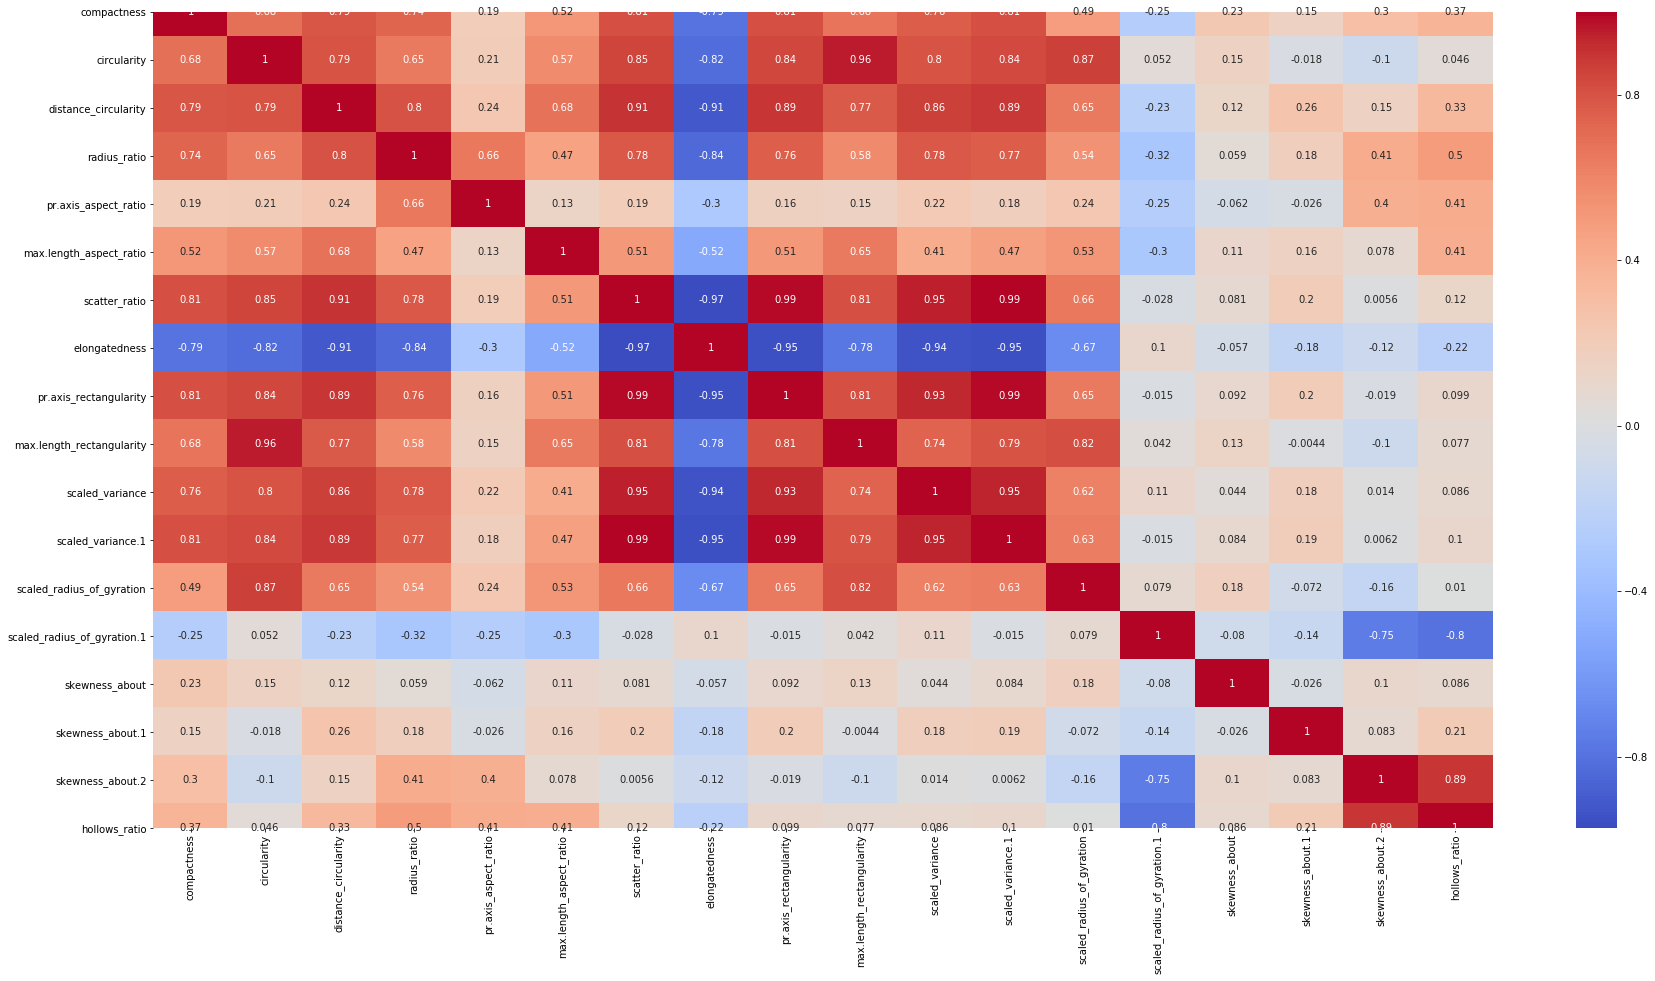

In [98]:
plt.figure(figsize=(30, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

From this heatmap we can conclude that **scaled_radius_of_gyration.1**, **pr.axis_aspect_ratio**, **skewness_about**, **skewness_about.1**, **skewness_about.2** and **hollows_ratio** are less corelated feature.

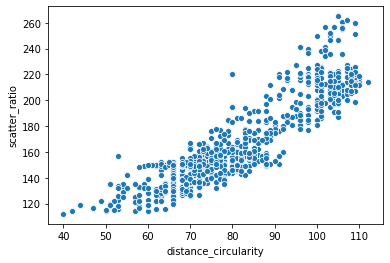

In [99]:
sns.scatterplot(x="distance_circularity", y="scatter_ratio", data=df)

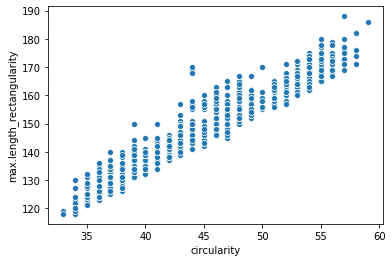

In [100]:
sns.scatterplot(x="circularity", y="max.length_rectangularity", data=df)

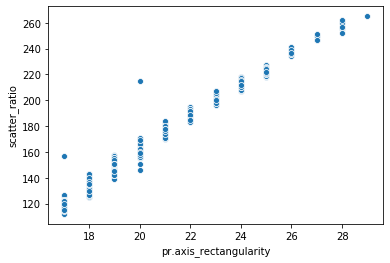

In [101]:
sns.scatterplot(x="pr.axis_rectangularity", y="scatter_ratio", data=df)

From above information we are going to drop the features which are having minimum co-relation.

In [0]:
df.drop(columns=["scaled_radius_of_gyration.1", "pr.axis_aspect_ratio", "skewness_about", "skewness_about.1", "skewness_about.2", "hollows_ratio"], inplace=True)

In [0]:
X = df.drop(columns="class").values
y = df["class"].values

In [104]:
from scipy.stats import zscore
X_scaled= zscore(X)
X_scaled

array([[ 0.16058035,  0.51807313,  0.05717723, ..., -0.40191985,
        -0.341934  ,  0.39417321],
       [-0.32546965, -0.62373151,  0.12074088, ..., -0.59335695,
        -0.61972438, -0.46982619],
       [ 1.25419283,  0.84430302,  1.51914112, ...,  1.09767077,
         1.109379  ,  1.59048007],
       ...,
       [ 1.49721783,  1.49676282,  1.20132288, ...,  1.25720168,
         1.59692947,  0.92586515],
       [-0.93303214, -1.43930625, -0.26064101, ..., -1.07194971,
        -0.95987586, -0.80213365],
       [-1.05454464, -1.43930625, -1.02340478, ..., -1.55054246,
        -1.28868896, -1.36705633]])

In [105]:
cov_matrix = np.cov(X_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.68569786  0.79086299  0.73701832  0.52218497  0.81358214
  -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566  0.49219572]
 [ 0.68569786  1.00118343  0.79325751  0.64673913  0.57256641  0.8489411
  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508  0.86883169]
 [ 0.79086299  0.79325751  1.00118343  0.8056218   0.67983048  0.90614687
  -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577  0.64684064]
 [ 0.73701832  0.64673913  0.8056218   1.00118343  0.46812133  0.7837959
  -0.83965529  0.75754644  0.58371086  0.77975331  0.7684914   0.54087315]
 [ 0.52218497  0.57256641  0.67983048  0.46812133  1.00118343  0.50973344
  -0.51704329  0.50837988  0.6540018   0.41055691  0.46984191  0.52997614]
 [ 0.81358214  0.8489411   0.90614687  0.7837959   0.50973344  1.00118343
  -0.97275069  0.99092181  0.81004084  0.94978498  0.9941867   0.65949914]
 [-0.78968322 -0.82244387 -0.9123854  -0.83965529 -0.51704329 -0.97275069
   1.0011834

In [106]:
e_vals, e_vecs = np.linalg.eig(cov_matrix)
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[ 0.27379696 -0.18350633  0.29222387 -0.22261508 -0.82516842  0.24751191
   0.05018532 -0.07751029 -0.0709456   0.02340372 -0.00654711 -0.00964533]
 [ 0.29680146  0.28391577 -0.29633364 -0.04055271 -0.14380401 -0.33055908
   0.12559181  0.0744358   0.108005    0.75060993  0.01128298 -0.12398404]
 [ 0.30566751 -0.02520836  0.24773772  0.04186048  0.25171967  0.19391502
   0.79267451  0.32553368  0.06947621 -0.05040842 -0.00100307  0.01287629]
 [ 0.26791448 -0.24013348  0.24847781  0.75916201 -0.1248152  -0.40694814
  -0.12875871  0.04866114  0.1576814  -0.08395777 -0.02048835  0.00501206]
 [ 0.20362413  0.52818976  0.69522112 -0.10991313  0.2350163   0.02972416
  -0.27195137 -0.19788308  0.05283004  0.10632893  0.02286016  0.01698828]
 [ 0.31684844 -0.16638572 -0.07347246 -0.14881     0.15349836  0.06570198
  -0.22350784  0.14366644  0.00451104  0.02866541 -0.83731808  0.20967195]
 [-0.31360689  0.16635402  0.02457989 -0.10269228 -0.19812748 -0.11402234
   0.15997624 -0.0

Cumulative Variance Explained [ 78.6207236   86.67022299  92.04446427  94.93513403  97.13174262
  98.1749368   98.82294597  99.38921761  99.70083339  99.88592897
  99.97107373 100.        ]


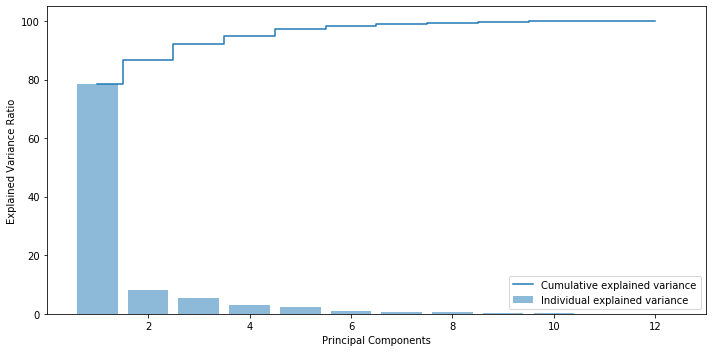

In [107]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

As per the **Cumulative Variance** to achieve above 95% variance, we need to select 5 principal component.

In [109]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
data_reduced = pca.fit_transform(X_scaled)
data_reduced.transpose()

array([[ 0.39428957, -1.51161207,  3.87681671, ...,  5.15023938,
        -3.36104407, -4.83520466],
       [-1.25614113, -0.51421227, -0.13513077, ..., -0.38686914,
         0.36771225,  0.39299638],
       [-0.46680368, -0.69743724, -0.26706257, ..., -0.75051299,
        -0.5619024 ,  0.17756396],
       [ 0.22470618, -0.39010723,  0.61524275, ..., -0.11673688,
         0.31889479, -0.27045903],
       [-0.37200391,  0.23756228, -0.13690428, ..., -0.08827541,
         0.35281952, -0.25376978],
       [ 0.45471838, -0.26669104, -0.6690969 , ...,  0.4942046 ,
        -0.5869631 , -0.0525319 ]])

In [110]:
pca.components_

array([[ 0.27379696,  0.29680146,  0.30566751,  0.26791448,  0.20362413,
         0.31684844, -0.31360689,  0.31391963,  0.28767723,  0.30235327,
         0.31267819,  0.24706163],
       [ 0.18350633, -0.28391577,  0.02520836,  0.24013348, -0.52818976,
         0.16638572, -0.16635402,  0.15874918, -0.36645445,  0.24877029,
         0.20337017, -0.47993664],
       [-0.29222387,  0.29633364, -0.24773772, -0.24847781, -0.69522112,
         0.07347246, -0.02457989,  0.0752472 ,  0.17914143,  0.14508116,
         0.10156261,  0.38108307],
       [-0.22261508, -0.04055271,  0.04186048,  0.75916201, -0.10991313,
        -0.14881   , -0.10269228, -0.22908629, -0.22937678, -0.03181103,
        -0.20137434,  0.42342641],
       [-0.82516842, -0.14380401,  0.25171967, -0.1248152 ,  0.2350163 ,
         0.15349836, -0.19812748,  0.12603979, -0.1364377 ,  0.2004351 ,
         0.11198581, -0.11920833],
       [-0.24751191,  0.33055908, -0.19391502,  0.40694814, -0.02972416,
        -0.06570198,  

<Figure size 2160x720 with 0 Axes>

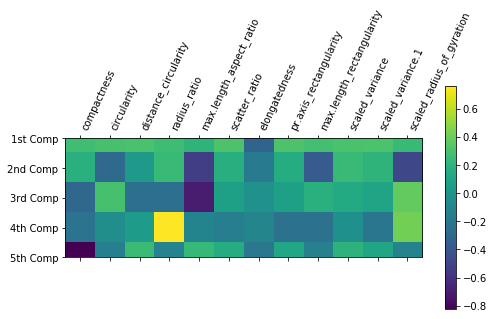

In [111]:
plt.figure(figsize=(30 , 10))
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp', '4th Comp','5th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(df.drop(columns="class").columns)),df.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()

In [112]:
from sklearn.model_selection import GridSearchCV
C=[0.01, 0.05, 0.5, 1]
kernel=("linear", "rbf")
param_grid = dict(C=C,kernel=kernel)
param_grid

{'C': [0.01, 0.05, 0.5, 1], 'kernel': ('linear', 'rbf')}

In [0]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv = 10, n_jobs=-1, verbose=3)

In [114]:
grid_result = grid.fit(X, y)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   29.0s finished


In [115]:
# Summarize results
import time
start_time = time.time()
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.884161 using {'C': 0.5, 'kernel': 'linear'}
Execution time: 0.0011658668518066406 ms


We can achieve best accuracy i.e. 88% by using parmeter **C** as 0.5 and **kernal** as linear.